# Linear Regression with Statsmodels and Scikit-Learn

Let's investigate the housing dataset with linear regression. We'll use two different packages and you can see examples for linear regression of each:
* statsmodels -- [linear regression](http://statsmodels.sourceforge.net/devel/examples/#regression)
* scikit-learn -- [linear regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

## Intro to Scikit-Learn

Scikit-learn is a machine learning package for python that includes a huge array of models including linear regression. Scikit-learn includes a number of sample data sets including the Boston housing data set.

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
data = datasets.load_boston()

In [2]:
print data.DESCR # Here's an example of a data dictionary

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Data exploration

Let's take a minute to see what the data looks like.

In [37]:
print data.feature_names
print data.data[0]
print data.target[0]



['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00]
24.0


In [38]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Let's get a feel for the distribution of each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11adf0e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118c57410>]], dtype=object)

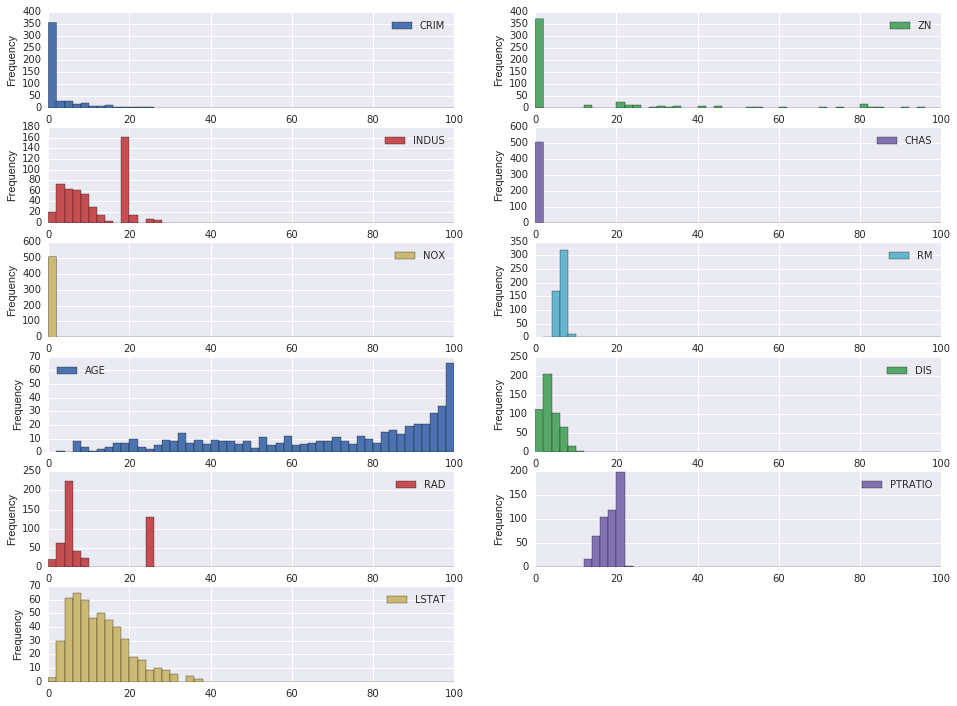

In [39]:
df.drop(['TAX','B'], axis=1).plot(kind='hist', subplots = True, layout = (6,2), sharex = False, bins = 50, figsize = (16,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113e7b790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113f62650>]], dtype=object)

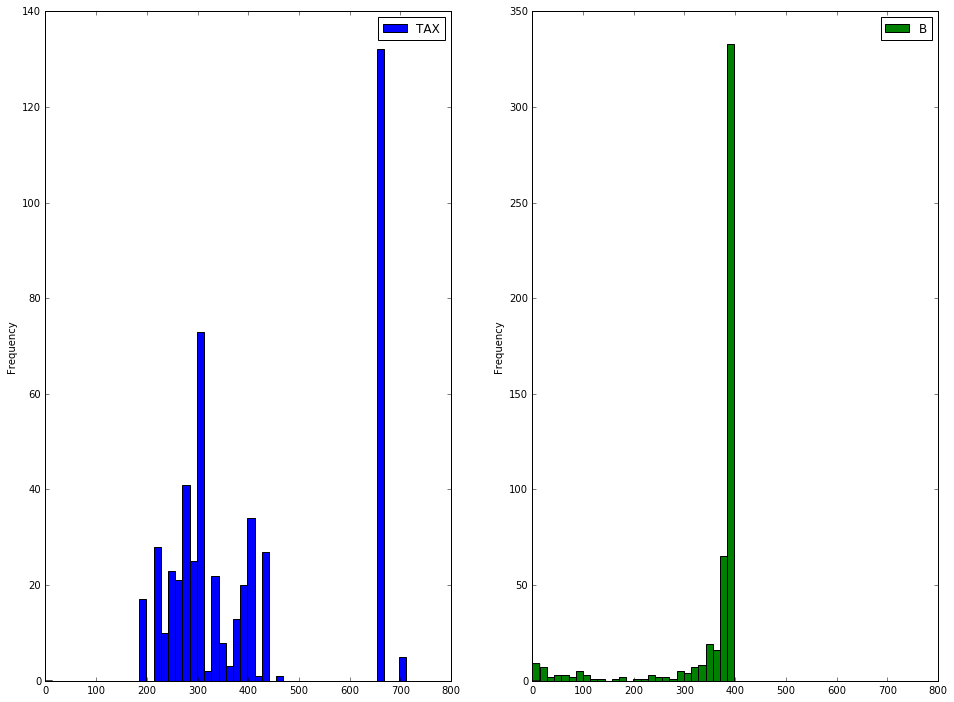

In [7]:
df[['TAX','B']].plot(kind='hist', subplots = True, layout = (1,2), sharex = False, bins = 50, figsize = (16,12))

Let's see how to build a linear regression with scikit-learn. Let's also put the target variable data into a data frame for convenience, and do a quick check to see that everything loaded correctly.

In [40]:

# Put the target (housing value -- MEDV) in another DataFrame
targets = pd.DataFrame(data.target, columns=["MEDV"])

# Take a look at the first few rows
print df.head()
print targets.head()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


There is a fair bit to play with. What a priori expectations do you have?

We can explore the data visually to find correlations.

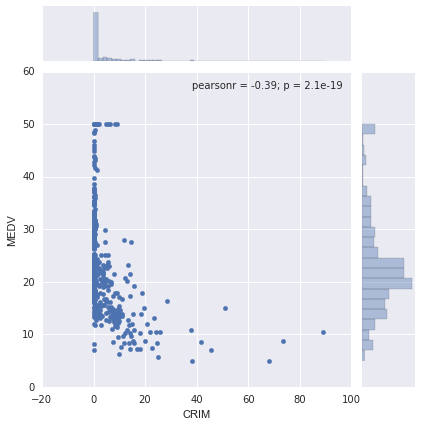

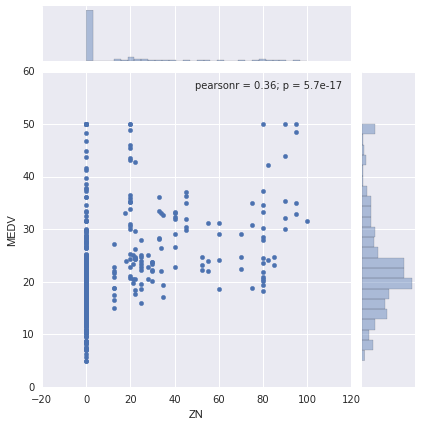

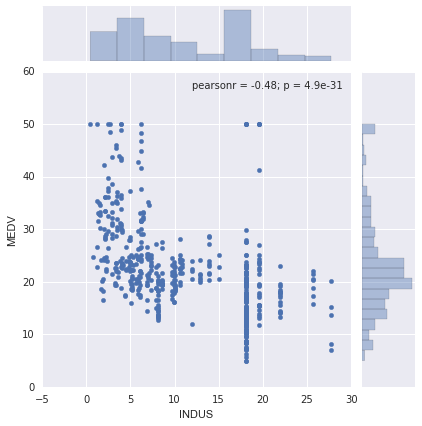

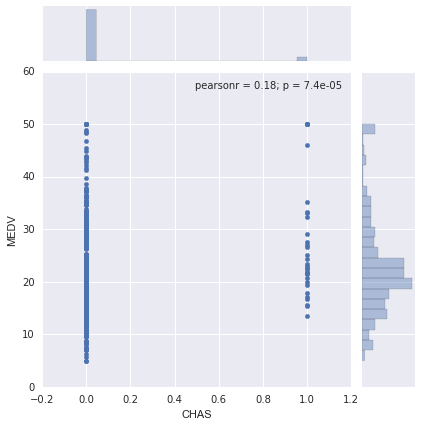

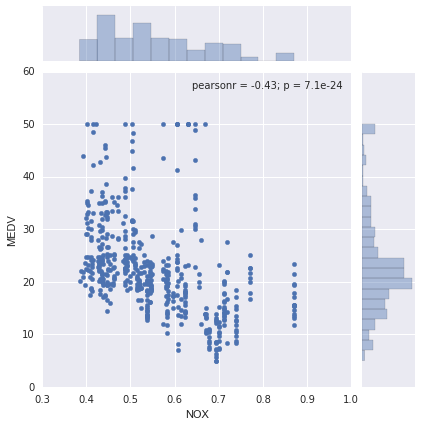

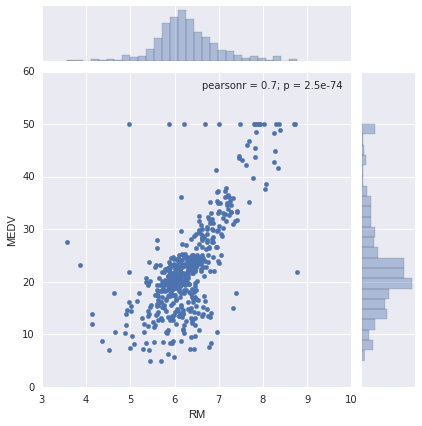

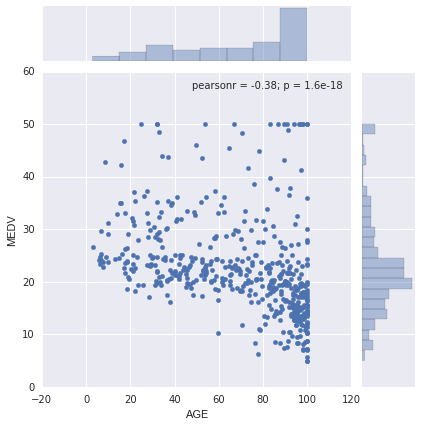

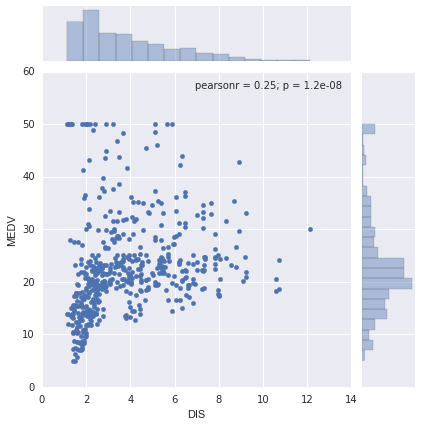

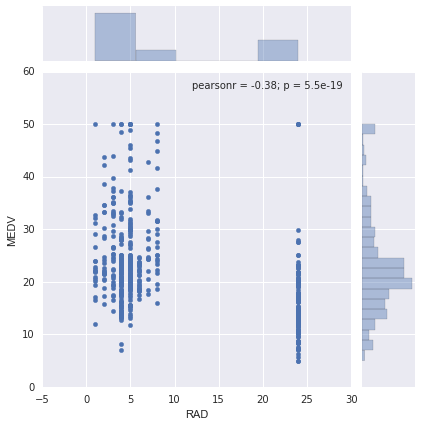

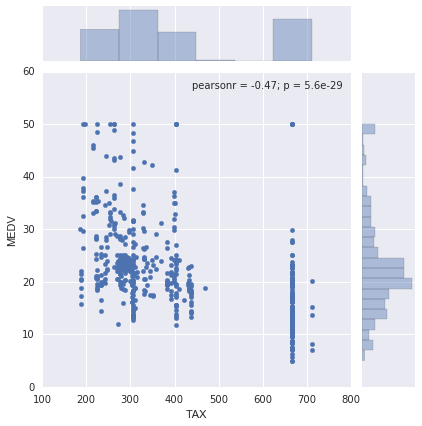

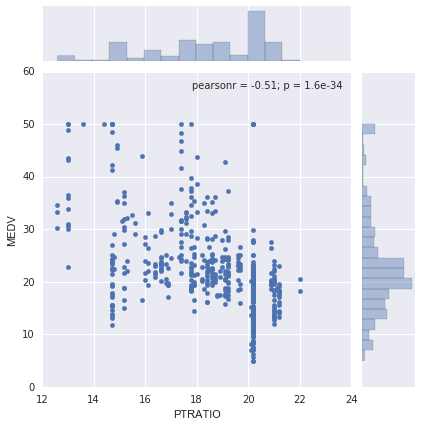

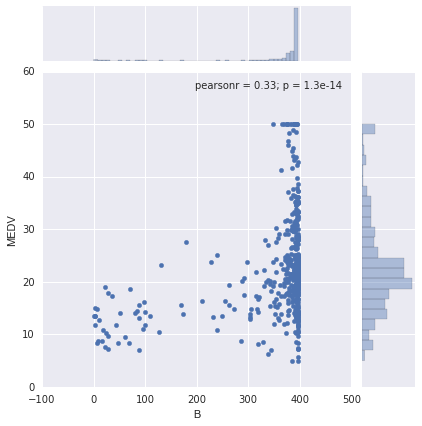

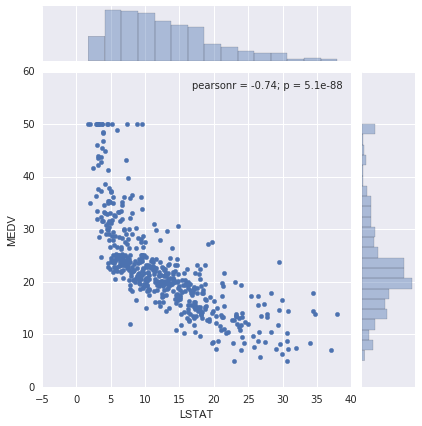

In [41]:
import seaborn as sns
for iv in df.columns.values:
    sns.jointplot(x=df[iv], y=targets["MEDV"])

# Fitting our 1st Model!

Now let's fit a linear model to the data. Let's look at some of the variables we identified visually as being linked to house value, RM and LSTAT. We can model each individually and then both together.

Note: If for some reason scikit-learn crashes the jupyter notebook, have conda remove mkl (there's an issue with the newer build on some systems).

In [10]:
lm = linear_model.LinearRegression()

X = df[["RM"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = lm.predict(X)

That's it! We have our model.

In [11]:
print(df['RM'][:5]) # The first 5 predictor values.
print(targets['MEDV'][:5]) # The first 5 outcome values.
print(predictions[:5]) # Our first 5 predictions, based on fitting a linear model MEDV ~ RM.

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64
[ 25.17574577  23.77402099  30.72803225  29.02593787  30.38215211]


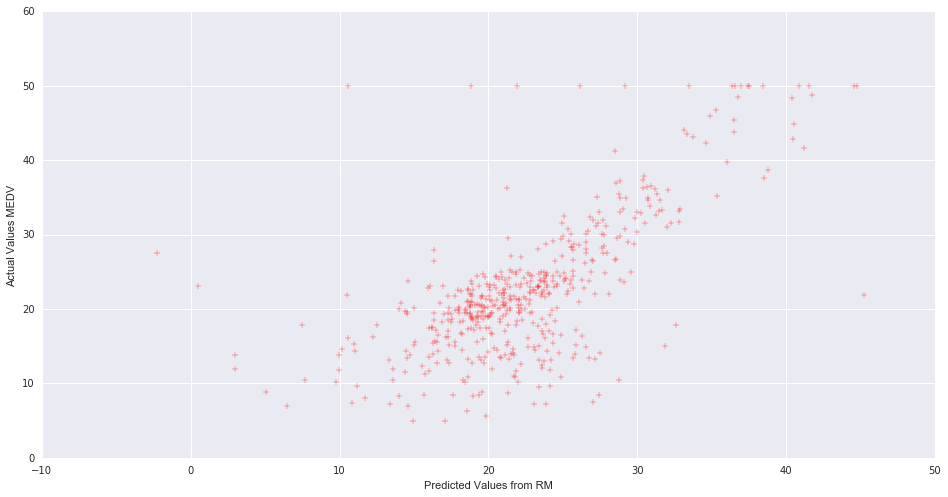

MSE: 43.6005517712


In [12]:
# How is it performing? Plot the model's predictions against actual values
# s = s: size in points, c = color, zorder = layer order

plt.figure(figsize=(16,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

**Check**: How does this plot relate to the model? In other words, how are the independent variable (RM) and dependent variable ("MEDV") incorporated?

We can modify this slightly to look at the residuals. What would you want the residuals to look like, given the usual assumptions for linear regression? If those residuals are poorly behaved, what could we consider?

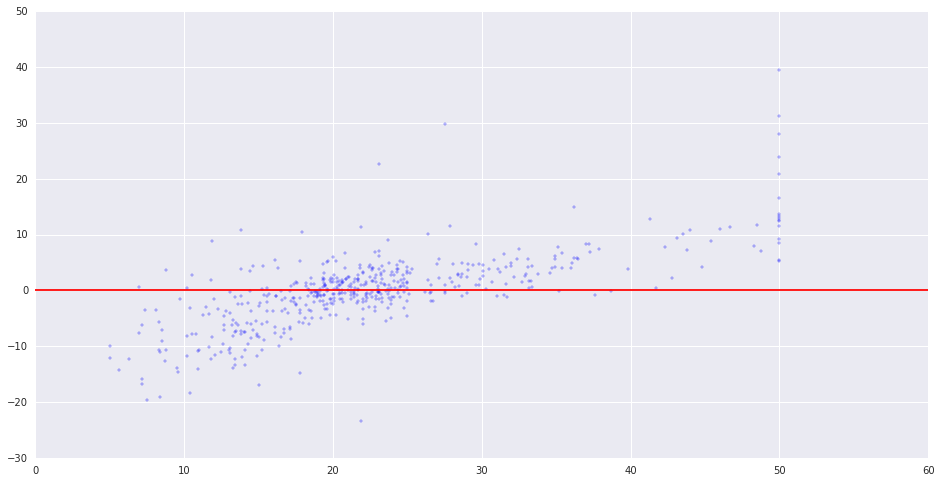

In [13]:
plt.figure(figsize=(16,8))
plt.scatter(y, y - predictions, c = 'b', marker = '+') # Look directly at the residuals
plt.axhline(0, color='r')

Now let's build a model where MEDV ~ LSTAT.

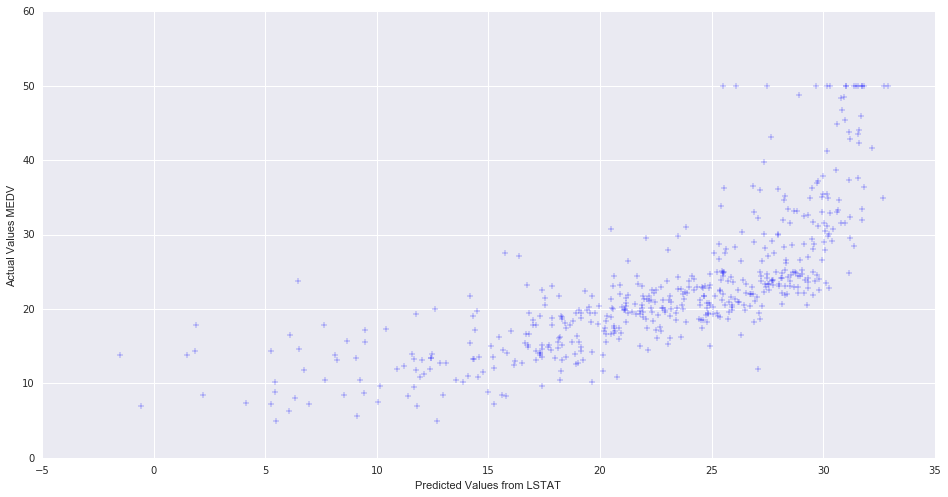

MSE: 38.4829672299


In [14]:
lm = linear_model.LinearRegression()

X = df[["LSTAT"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# Plot the model
plt.figure(figsize=(16,8))
plt.scatter(predictions, y, s=30, c='b', marker='+', zorder=10)
plt.xlabel("Predicted Values from LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

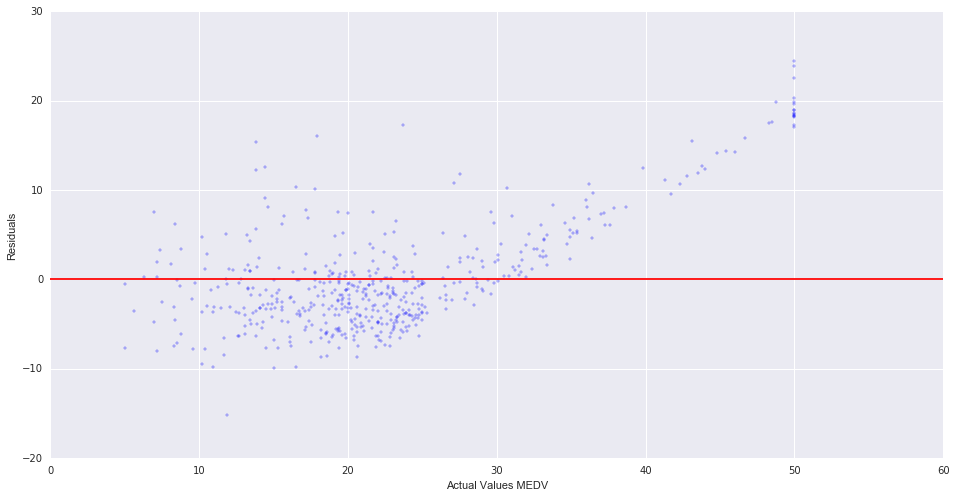

In [15]:
plt.figure(figsize=(16,8))
plt.scatter(y, y - predictions, c = 'b', marker = '+') # Look directly at the residuals
plt.xlabel("Actual Values MEDV")
plt.ylabel("Residuals")
plt.axhline(0, color='r')
plt.show()

We can see a trend line in the residuals -- let's try transforming the predictor variable.

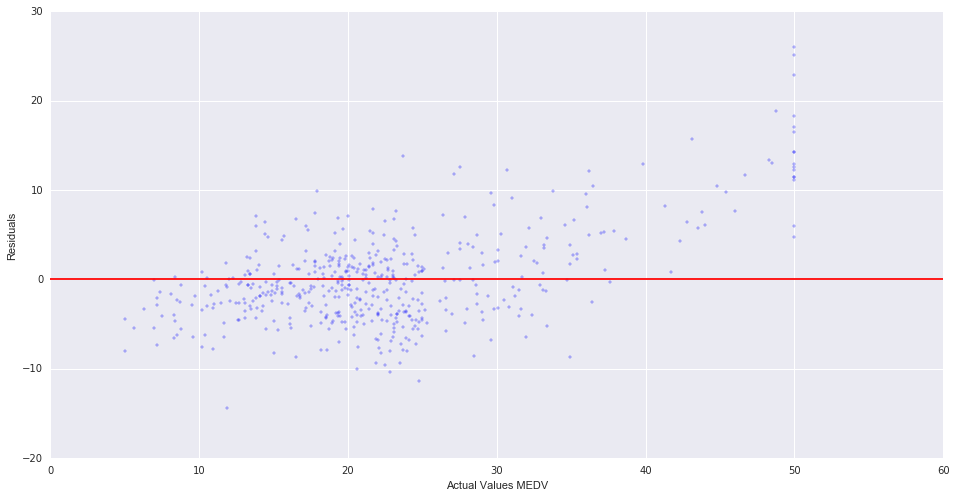

MSE: 28.2850909841


In [16]:
lm = linear_model.LinearRegression()

X = np.log(df[["LSTAT"]]) # Logging this predictor
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# Plot the new model's residuals
plt.figure(figsize=(16,8))
plt.xlabel("Actual Values MEDV")
plt.ylabel("Residuals")
plt.scatter(y, y - predictions, c = 'b', marker = '+')
plt.axhline(0, color='r')
plt.show()

plt.show()
print "MSE:", mean_squared_error(y, predictions)

Time for multilinear regression! The syntax is nicely extensible.

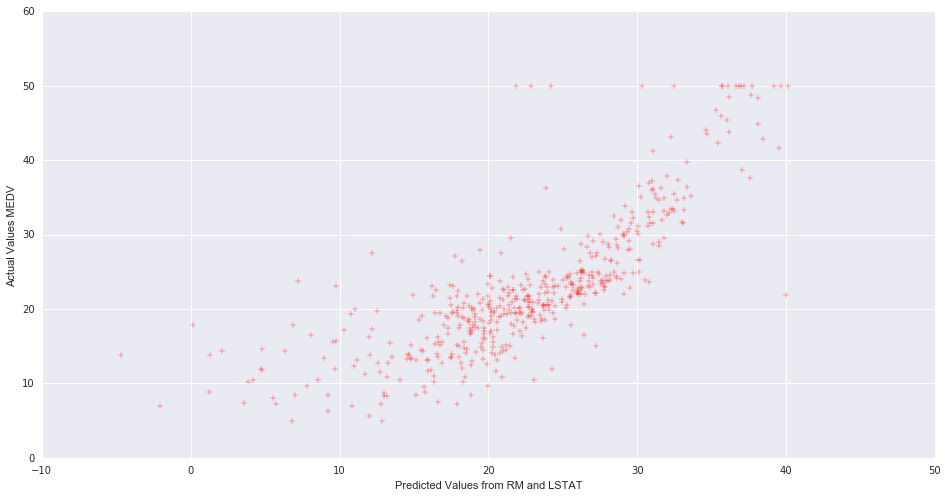

MSE: 30.5124687773


In [19]:
lm = linear_model.LinearRegression()

X = df[["RM","LSTAT"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.figure(figsize=(16,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=1)
plt.xlabel("Predicted Values from RM and LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

## Comparing the models

A perfect fit would yield a straight line when we plot the predicted values versus the true values. We'll quantify the goodness of fit soon.

### Exercise

Run the fit on all the variables with `X = df`. Did this improve the fit versus the previously tested variable combinations? (Use mean squared error).

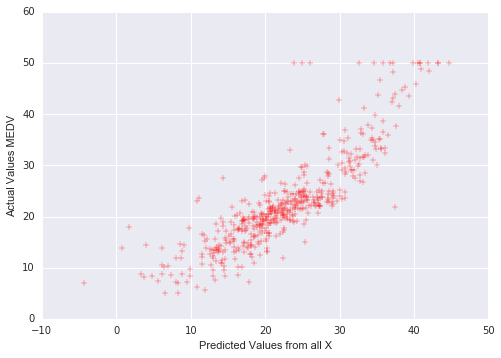

MSE: 21.8977792177


In [20]:
# Use the entire df of predictors as X

X = df

model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from all X")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

## Intro to Statsmodels

Now let's see how to use another popular package for regressions.

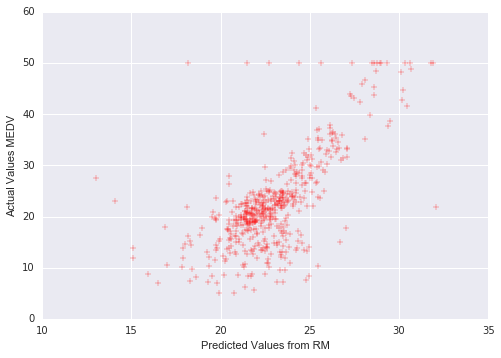

MSE: 58.4106354321


In [25]:
import statsmodels.api as sm

X = df["RM"]
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

statsmodels has a great Matlab/R-style summary method for its models.

In [22]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Mon, 20 Jun 2016   Prob (F-statistic):          3.74e-256
Time:                        14:45:36   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.0

## Guided Practice

Compare this to the analgous fit from scikit-learn above.

### Exercises

Recreate the model fits above with `statsmodels`:
* a model using LSTAT
* a model using RM and LSTAT
* a model using all the variables

Compare the mean squared errors for each model between the two packages. Do they differ significantly? Why or why not?

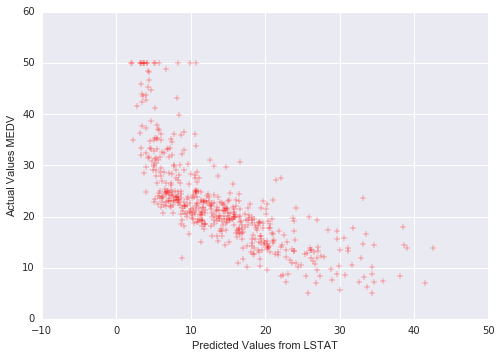

MSE: 326.480644353


In [28]:
import statsmodels.api as sm

X = df[["LSTAT"]]
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

## Independent Practice

Using our preference of `scikit-learn` or `statsmodels`, try to find the best models that you can that:
* use only two variables
* only three variables
* only four variables

Evaluate your models using the squared error. Which has the lowest? How do the errors compare to using all the variables?

In [108]:
# Start your exercises here



# Bonus Exercises

From the LSTAT plot you may have noticed that the relationship is not quite linear. Add a new column `"LSTAT2"` to your data frame for the LSTAT values squared and try to fit a quadratic function using `["LSTAT", "LSTAT2"]`. Is the resulting fit better or worse?

In [29]:
# Start your exercises here
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [44]:
new_col = []
for i in range(len(df["LSTAT"])):
    new_col.append(df["LSTAT"][i] ** 2)
df['LSTAT2']=new_col
    

In [45]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,LSTAT2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,28.4089


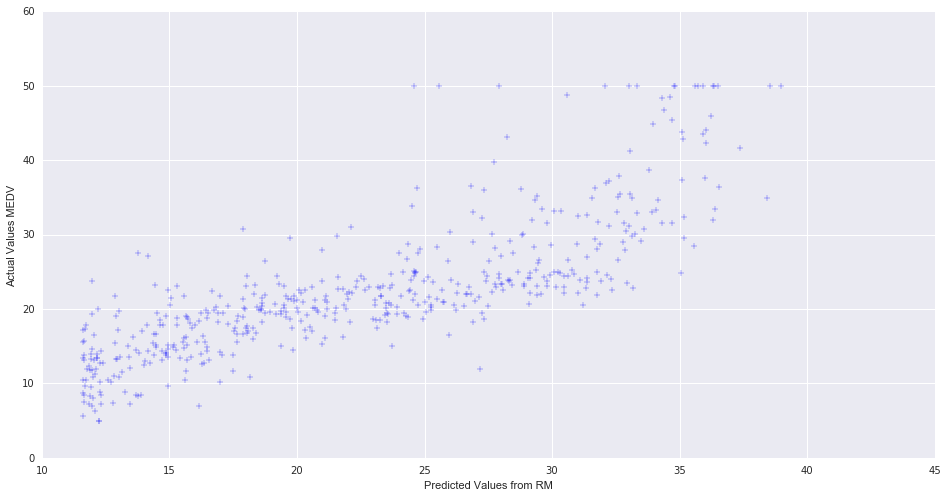

MSE: 30.3305200759


In [51]:

X = df[["LSTAT", "LSTAT2"]]
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# Plot the model
plt.figure(figsize=(16,8))
plt.scatter(predictions, y, s=30, c='b', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)
